In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_log_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

## Feature Selection

In [4]:
importance = pd.Series(
    LassoCV(alphas = np.logspace(-1,4,25)).fit(data, y).coef_, 
    index = data.columns)

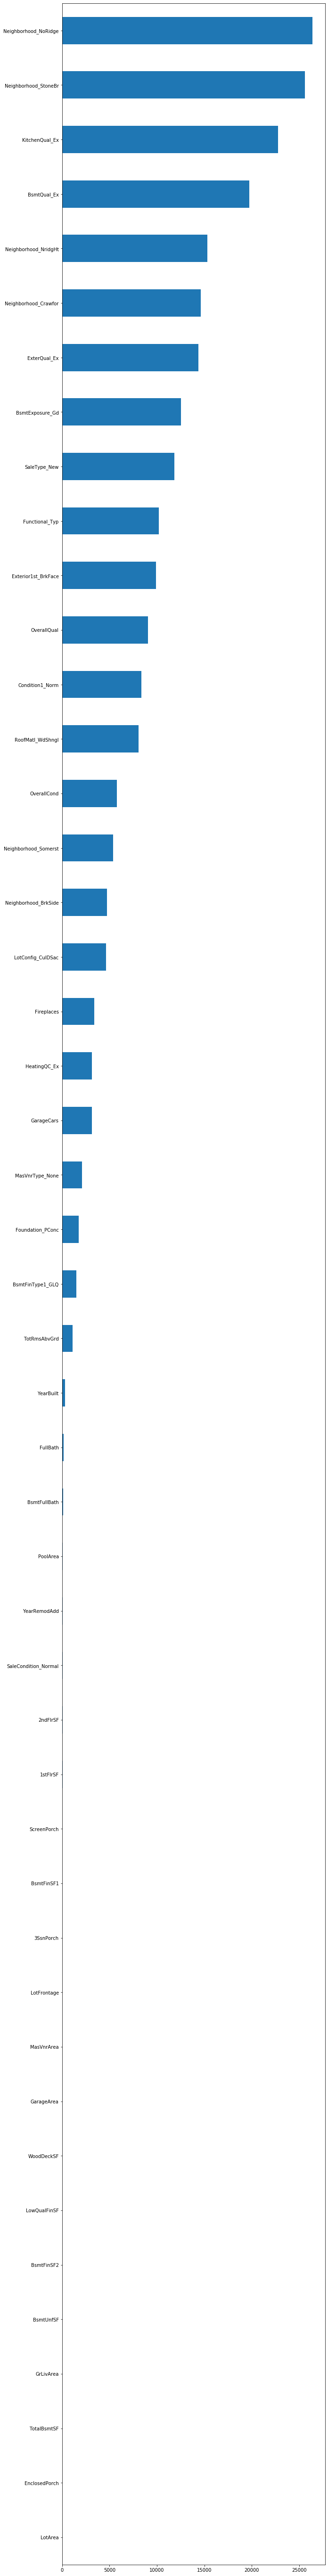

In [9]:
imp_coef = importance.loc[importance > 0].sort_values()
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 100.0)
imp_coef.plot(kind = "barh")

## Модель №2 с Feature Selection: 0.14766 public score

In [10]:
for col in importance.keys():
    if(importance[col] < 0):
        del data[col]
        del data_test[col]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [12]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1,4,25))

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [13]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.13064914986803344

In [14]:
result = pd.DataFrame()

In [15]:
result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

In [13]:
result.to_csv('out_2.csv', index=False, header=True)

## Strong Feature Selection

In [20]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [21]:
for col in importance.keys():
    if(importance[col] <= 0):
        del data[col]
        del data_test[col]

## Модель №3 c Strong Feature Selection: 0.33128 public score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [23]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1,4,25))

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [24]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.15454772695011382

In [25]:
result = pd.DataFrame()

In [26]:
result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

In [27]:
result.to_csv('out_3.csv', index=False, header=True)

## Модель №4: 0.14235 score

Вернемся к 1 модели с максимально полным набором данных и попробуем взять модель с другими параметрами

In [28]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [30]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1, 4,25), normalize = True, tol=1e-2)

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.01,
        verbose=False)

In [31]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.12081194268082396

In [32]:
result = pd.DataFrame()

result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

result.to_csv('out_4.csv', index=False, header=True)

## Модель №5 PCA: 0.33295

In [33]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [34]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=29, batch_size=60)
data = ipca.fit(data).transform(data) 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [36]:
clf = LassoCV(alphas = np.logspace(-1, 4,25), normalize = True, tol=1e-2)
clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.01,
        verbose=False)

In [37]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.16898577907813175

In [38]:
result = pd.DataFrame()

result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(ipca.transform(data_test))

result.to_csv('out_5.csv', index=False, header=True)

## Модель №6: 0.14179

In [130]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [131]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
data = data.drop(to_drop, axis=1)
data_test = data_test.drop(to_drop, axis=1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [133]:
clf = LassoCV(alphas = np.logspace(-1, 4,25), normalize = True, tol=1e-2)
clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.01,
        verbose=False)

In [134]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.12048361382948161

In [135]:
result = pd.DataFrame()

result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

result.to_csv('out_6.csv', index=False, header=True)

## Объединение моделей  (4 2 и 1): 0.14127

In [87]:
out = pd.read_csv('out.csv')
out_4 = pd.read_csv('out_4.csv')
out_2 = pd.read_csv('out_2.csv')

In [88]:
result = pd.DataFrame()
result['Id'] = answer['Id']
result['SalePrice'] = (out['SalePrice'] + out_2['SalePrice'] + out_4['SalePrice']) / 3

In [89]:
result.to_csv('out_mix.csv', index=False, header=True)

## Объединение моделей  (4 и 1): 0.14009

In [90]:
out = pd.read_csv('out.csv')
out_4 = pd.read_csv('out_4.csv')

In [91]:
result = pd.DataFrame()
result['Id'] = answer['Id']
result['SalePrice'] = (out['SalePrice'] + out_4['SalePrice']) / 2

In [92]:
result.to_csv('out_mix_2.csv', index=False, header=True)

## Объединение моделей  (1 и 6): 0.13930

In [136]:
out = pd.read_csv('out.csv')
out_6 = pd.read_csv('out_6.csv')

In [137]:
result = pd.DataFrame()
result['Id'] = answer['Id']
result['SalePrice'] = (out['SalePrice'] + out_6['SalePrice']) / 2

In [138]:
result.to_csv('out_mix_3.csv', index=False, header=True)